# **Loading in Data & Exploration**

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

In [3]:
df = load_data("train.csv")

df.columns
df.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [4]:
#df.describe()
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [5]:
df.shape

(7905, 20)

In [6]:
missing_values = df.isnull().sum()
missing_values

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

# **Preprocessing**

In [7]:
from scipy import stats

numeric_columns = df.select_dtypes(include=['number']).columns                  # selecting numerical columns to remove outliers
z_scores = stats.zscore(df[numeric_columns])

outlier_mask = (abs(z_scores) < 3).all(axis=1)                                  # for z-score (99.7%)
df_no_outliers = df[outlier_mask]

print("DataFrame before removing outliers:", df.shape)
print("DataFrame after removing outliers:", df_no_outliers.shape)

DataFrame before removing outliers: (7905, 20)
DataFrame after removing outliers: (6836, 20)


In [8]:
df_no_outliers_encoded = pd.get_dummies(df_no_outliers.select_dtypes("object")) # one-hot encoding for categorical variables

# Combine encoded DataFrame with the original numeric columns
df_encoded = pd.concat([df_no_outliers.drop(df_no_outliers.select_dtypes("object").columns, axis=1), df_no_outliers_encoded], axis=1)

In [9]:
from scipy.stats import boxcox

numerical_columns = df_encoded.select_dtypes(include=['number']).columns        # Select numerical columns

for column in numerical_columns:                                                # Apply Box-Cox transformation to numerical columns
    df_encoded[column], _ = boxcox(df_encoded[column] + 1)                      # Adding 1 to handle zero and negative values

df_encoded.columns

Index(['id', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Drug_D-penicillamine', 'Drug_Placebo', 'Sex_F', 'Sex_M',
       'Ascites_N', 'Ascites_Y', 'Hepatomegaly_N', 'Hepatomegaly_Y',
       'Spiders_N', 'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y', 'Status_C',
       'Status_CL', 'Status_D'],
      dtype='object')

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                                                       # Initialize StandardScaler
numerical_columns = df_encoded.select_dtypes(include=['number']).columns        # Select numerical columns
numerical_columns = numerical_columns.drop('id')                                # Exclude 'id' column

df_preprocessed = df_encoded.copy()                                             # Make a copy to avoid modifying the original DataFrame
df_preprocessed = df_preprocessed.drop('id', axis=1)                            # Drop 'id' column from df_preprocessed
df_preprocessed[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

print(df_preprocessed.head())

     N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos  \
0 -1.052593  0.916588   0.982951     0.192415 -0.761399  1.616232  0.554776   
1  0.499446  0.299882  -0.335648     0.633839 -0.168361  0.133445  0.384752   
2  1.180412 -1.255352   1.331359     0.010852 -0.136231  1.202977 -0.211979   
3  0.501133  0.087388  -1.004459    -0.527467 -0.295961  0.016503  0.604461   
4 -1.317986 -0.413427  -0.014685     0.479219  0.190153  0.133445  0.043756   

       SGOT  Tryglicerides  Platelets  ...  Hepatomegaly_N  Hepatomegaly_Y  \
0  1.507512      -1.351168   1.495256  ...            True           False   
1  0.719841      -0.394034   1.142802  ...            True           False   
2  0.394919      -2.032139  -0.767843  ...           False            True   
3 -0.915994      -0.150247   0.101580  ...            True           False   
4  0.529013      -0.150247   0.440347  ...           False            True   

   Spiders_N  Spiders_Y  Edema_N  Edema_S  Edema_Y  Stat

# **Visualization**

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_pairplots(dataframe):
    # mapping of statuses
    status_map = {'Status_C': 'Cirrhosis', 'Status_CL': 'Cirrhosis with Liver Failure', 'Status_D': 'Liver Failure'}

    for status, desc in status_map.items():
        dataframe[desc] = dataframe[status].map({True: desc, False: 'Not ' + desc})

    plot_columns = dataframe.columns.drop(list(status_map.keys()))
    pair_plot = sns.pairplot(dataframe[plot_columns], hue='Cirrhosis', palette='viridis', diag_kind='kde')

    pair_plot.fig.suptitle('Pairplot of the dataset by Cirrhosis Status', y=1.02)
    plt.show()


In [12]:
#plot_pairplots(df_preprocessed)

# **Model**

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [14]:
df_encoded.dtypes

id                      float64
N_Days                  float64
Age                     float64
Bilirubin               float64
Cholesterol             float64
Albumin                 float64
Copper                  float64
Alk_Phos                float64
SGOT                    float64
Tryglicerides           float64
Platelets               float64
Prothrombin             float64
Stage                   float64
Drug_D-penicillamine       bool
Drug_Placebo               bool
Sex_F                      bool
Sex_M                      bool
Ascites_N                  bool
Ascites_Y                  bool
Hepatomegaly_N             bool
Hepatomegaly_Y             bool
Spiders_N                  bool
Spiders_Y                  bool
Edema_N                    bool
Edema_S                    bool
Edema_Y                    bool
Status_C                   bool
Status_CL                  bool
Status_D                   bool
dtype: object

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Preparing feature matrix X and target vector y
X = df_encoded.drop(['Status_C', 'Status_CL', 'Status_D'], axis=1)
y = df_encoded[['Status_C', 'Status_CL', 'Status_D']].idxmax(axis=1)  # Convert one-hot encoded target back to a single column

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=202)

# Initialize and train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Initialize and train Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predictions
log_reg_preds = log_reg.predict(X_test)
rf_preds = random_forest.predict(X_test)

# Evaluations
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, log_reg_preds)}")
print(f"Precision: {precision_score(y_test, log_reg_preds, average='macro')}")
print(f"Recall: {recall_score(y_test, log_reg_preds, average='macro')}")
print(f"F1-Score: {f1_score(y_test, log_reg_preds, average='macro')}")

print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_preds)}")
print(f"Precision: {precision_score(y_test, rf_preds, average='macro')}")
print(f"Recall: {recall_score(y_test, rf_preds, average='macro')}")
print(f"F1-Score: {f1_score(y_test, rf_preds, average='macro')}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Performance:
Accuracy: 0.7960526315789473
Precision: 0.5025990903183886
Recall: 0.5081412232116794
F1-Score: 0.5045611651800664

Random Forest Performance:
Accuracy: 0.8326023391812866
Precision: 0.7577411127052448
Recall: 0.5517488262720103
F1-Score: 0.561564696557992


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=202)

# Determine the sizes of the training and test sets
train_size = X_train.shape[0]
test_size = X_test.shape[0]
test_size

1368

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

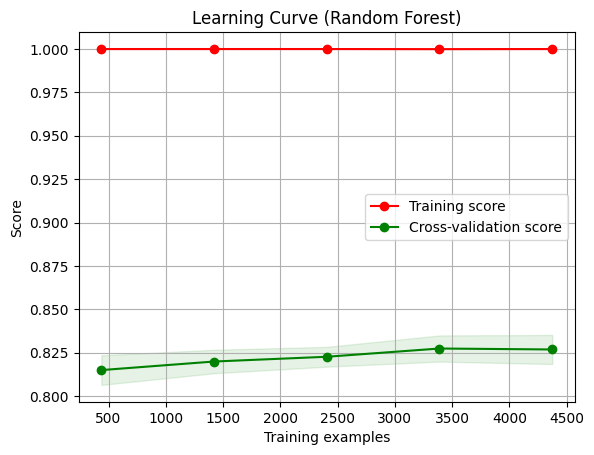

In [17]:
plot_learning_curve(random_forest, "Learning Curve (Random Forest)", X_train, y_train, cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

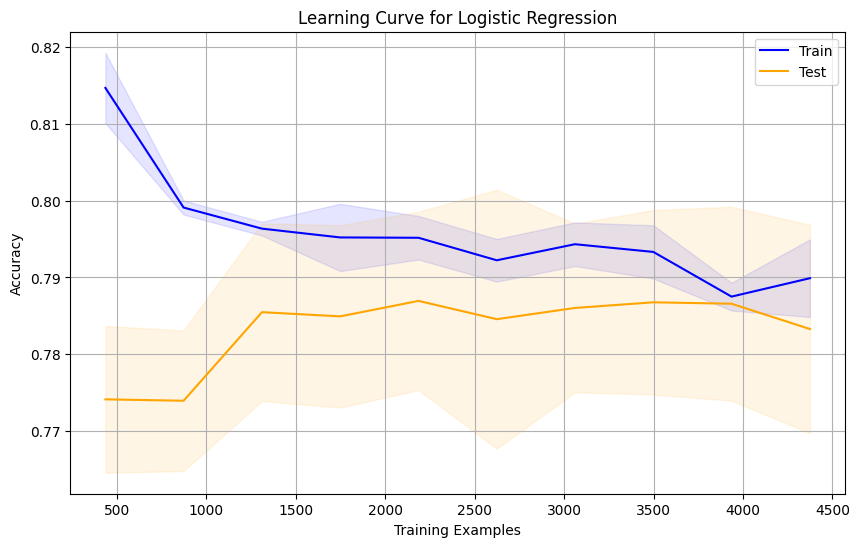

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Define the train_sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute the learning curve
train_sizes_abs, train_scores, test_scores = learning_curve(
    estimator=log_reg,
    X=X_train,
    y=y_train,
    train_sizes=train_sizes,
    cv=5,  # Number of folds in cross-validation
    scoring='accuracy'  # Evaluation metric
)

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_abs, train_scores_mean, label='Train', color='blue')
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes_abs, test_scores_mean, label='Test', color='orange')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='orange')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()
